# Problem Statement

Investigate the reasons behind employee attrition at our company by analyzing historical data. Identify key factors contributing to job dissatisfaction and employee exits. Utilize predictive modeling to anticipate potential attrition risks, enabling proactive HR strategies. Ultimately, enhance retention efforts and foster a positive work environment.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Fix the import statement for matplotlib
import seaborn as sns
import plotly.express as px
# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [97]:
df=pd.read_csv('Employee ATT.csv')

In [98]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,jobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,2,...,Yes,11,3,1,0,8,0,1,6,4
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,No,23,4,4,1,10,3,3,10,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,1,...,Yes,15,3,2,0,7,3,3,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,1,...,Yes,11,3,3,0,8,3,3,8,7
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,1,...,No,12,3,4,1,6,3,3,2,2


In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
jobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   jobLevel                  1470 non-null   int64 
 10  JobRole                   1470 non-null   object
 11  JobSatisfaction           1470 non-null   int64 
 12  MaritalStatus             1470 non-null   object
 13  MonthlyIncome             1470 non-null   int64 
 14  NumCompaniesWorked      

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
jobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
dtype: int64

In [10]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,jobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252
std,9.135373,8.106864,1.024165,1.093082,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000


In [11]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,jobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,2,...,Yes,11,3,1,0,8,0,1,6,4
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,No,23,4,4,1,10,3,3,10,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,1,...,Yes,15,3,2,0,7,3,3,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,1,...,Yes,11,3,3,0,8,3,3,8,7
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,1,...,No,12,3,4,1,6,3,3,2,2


In [12]:
df.shape

(1470, 25)

# Exploratory data analysis

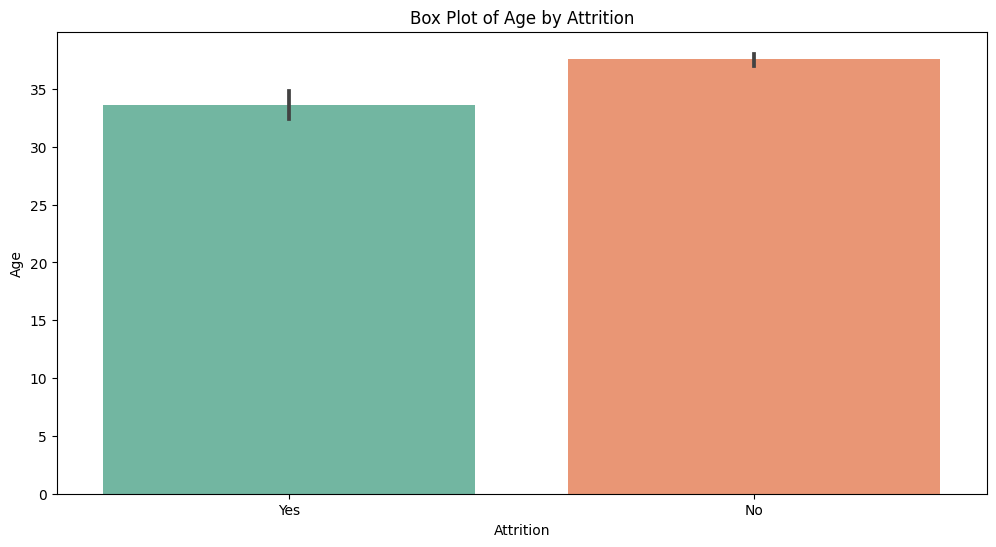

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Attrition', y='Age', data=df, palette='Set2')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.title('Box Plot of Age by Attrition')
plt.show()

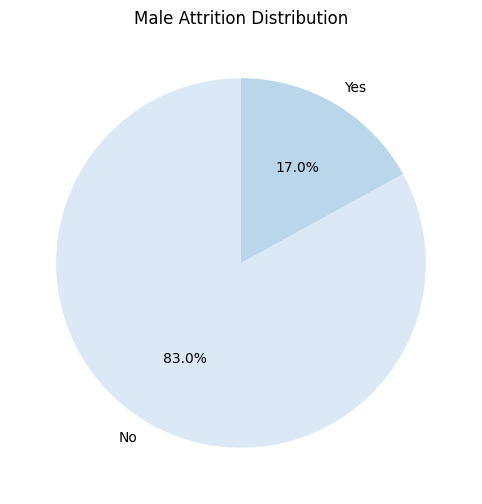

In [14]:
contingency_table = pd.crosstab(df['Gender'], df['Attrition'])

# Choose a specific gender or attrition level for the pie chart
selected_category = 'Male'  # Replace with the category you want to represent
selected_data = contingency_table.loc[selected_category]
plt.figure(figsize=(8, 6))
plt.pie(selected_data, labels=selected_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))
plt.title(f"{selected_category} Attrition Distribution")
plt.show()

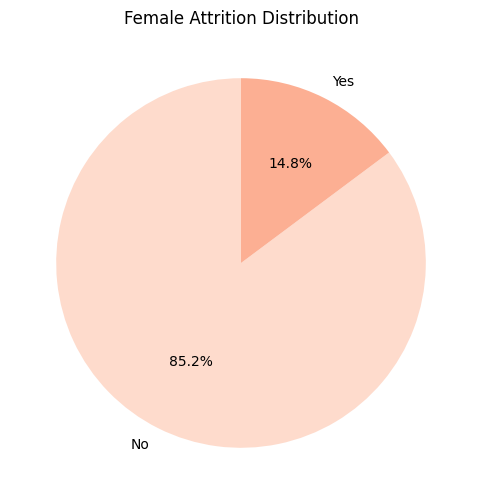

In [15]:
contingency_table = pd.crosstab(df['Gender'], df['Attrition'])
# Choose a specific gender or attrition level for the pie chart
selected_category = 'Female' 
selected_data = contingency_table.loc[selected_category]
plt.figure(figsize=(8, 6))
plt.pie(selected_data, labels=selected_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Reds'))
plt.title(f"{selected_category} Attrition Distribution")
plt.show()

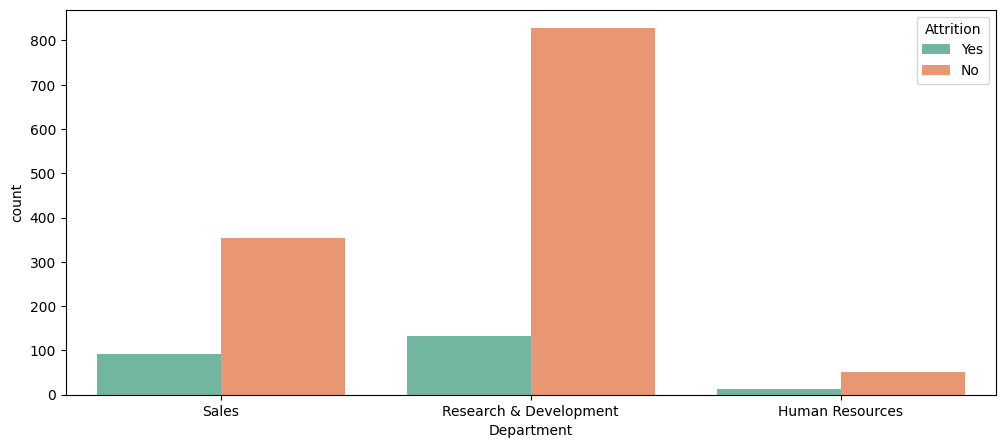

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(x='Department',hue='Attrition',data=df,palette='Set2')
plt.show()

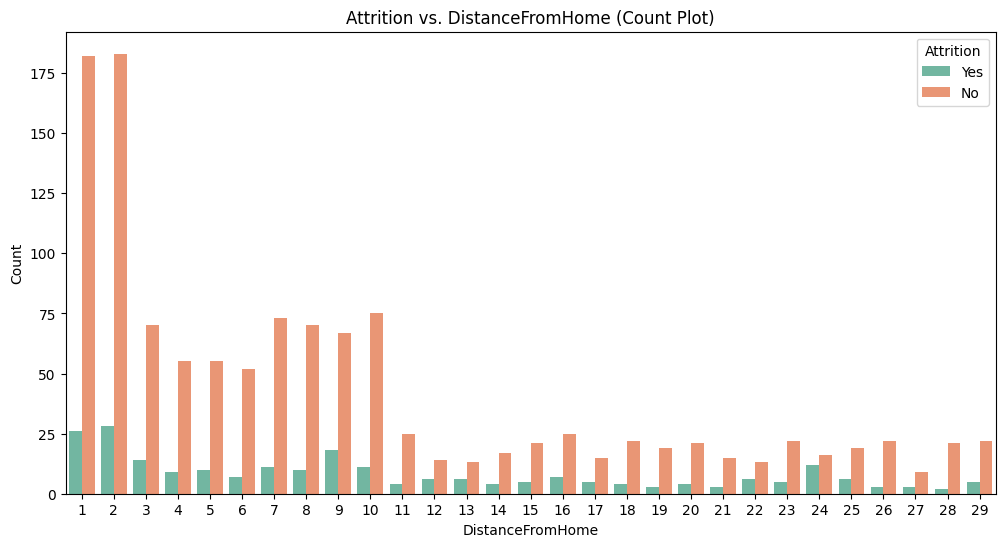

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='DistanceFromHome', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition vs. DistanceFromHome (Count Plot)')
plt.xlabel('DistanceFromHome')
plt.ylabel('Count')
plt.show()

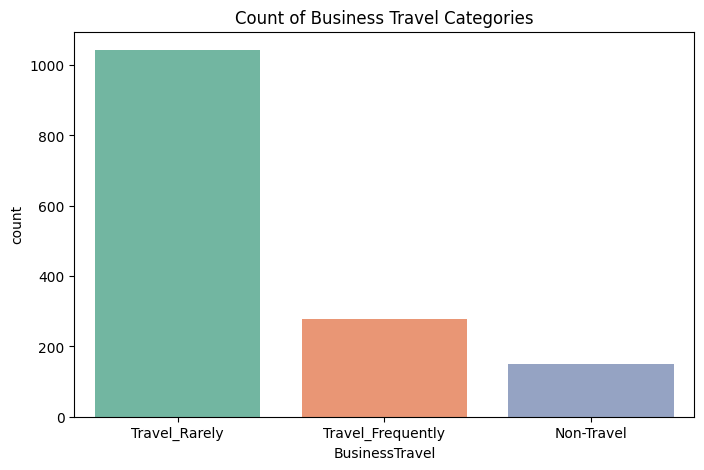

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='BusinessTravel', data=df,palette='Set2')
plt.title('Count of Business Travel Categories')
plt.show()

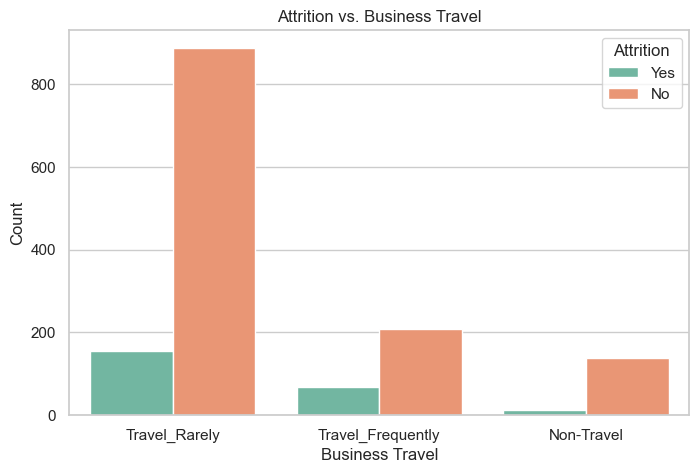

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette='Set2', dodge=True)
plt.title('Attrition vs. Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.show()

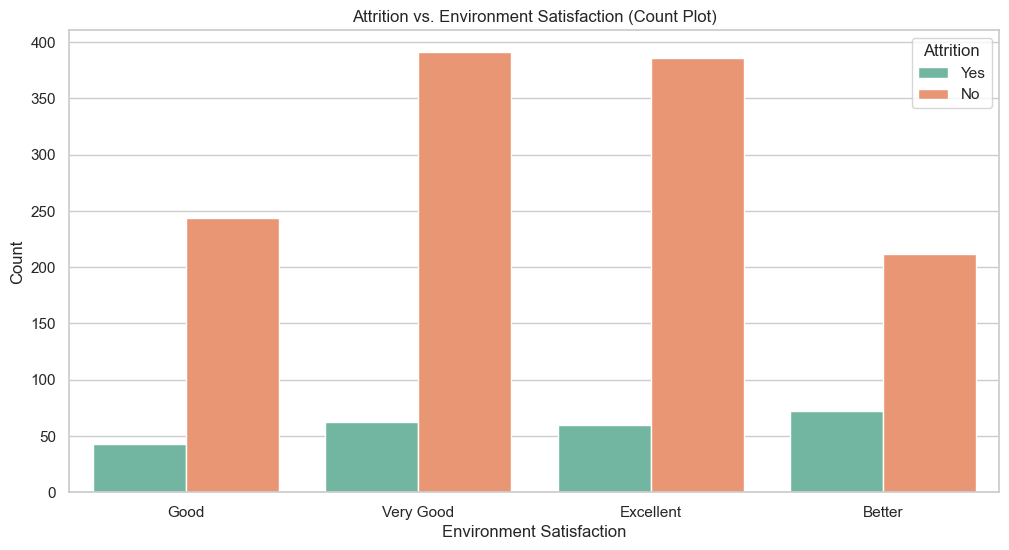

In [20]:
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].map({
    1: 'Better',
    2: 'Good',
    3: 'Very Good',
    4: 'Excellent'
})

# Convert 'Attrition' to string
df['Attrition'] = df['Attrition'].astype(str)

plt.figure(figsize=(12, 6))
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition vs. Environment Satisfaction (Count Plot)')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Count')
plt.show()



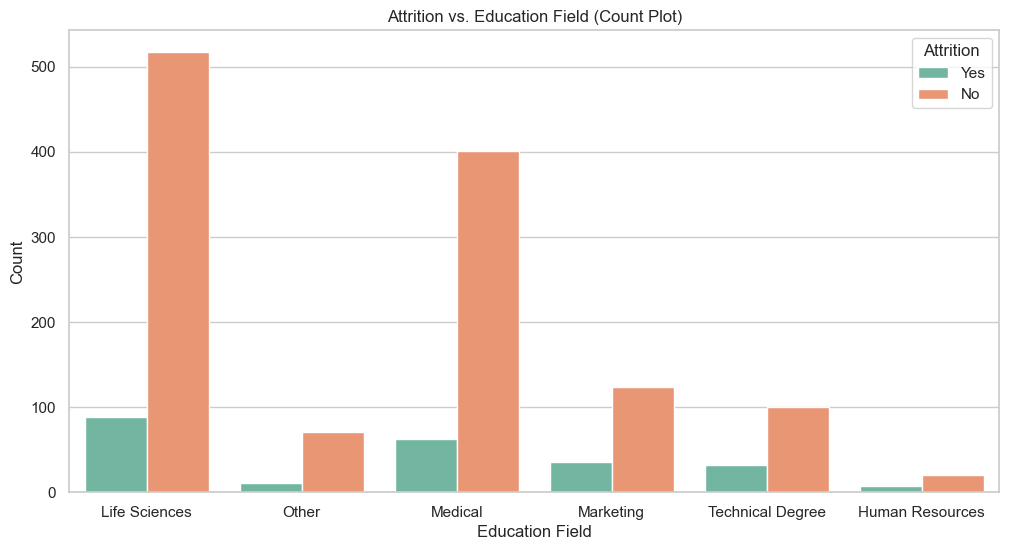

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='EducationField', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition vs. Education Field (Count Plot)')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.show()

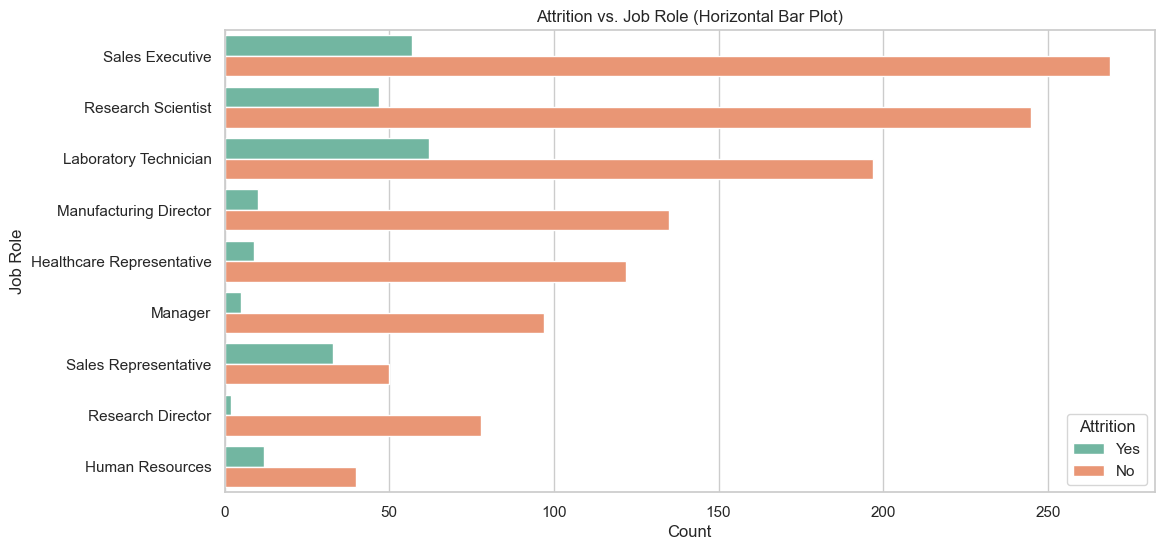

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(y='JobRole', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition vs. Job Role (Horizontal Bar Plot)')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.show()

In [23]:
df['jobLevel'] = df['jobLevel'].map({
    1: 'Entry level',
    2: 'Junior',
    3: 'Mid-level',
    4: 'Senior',
    5: 'Executive'
})

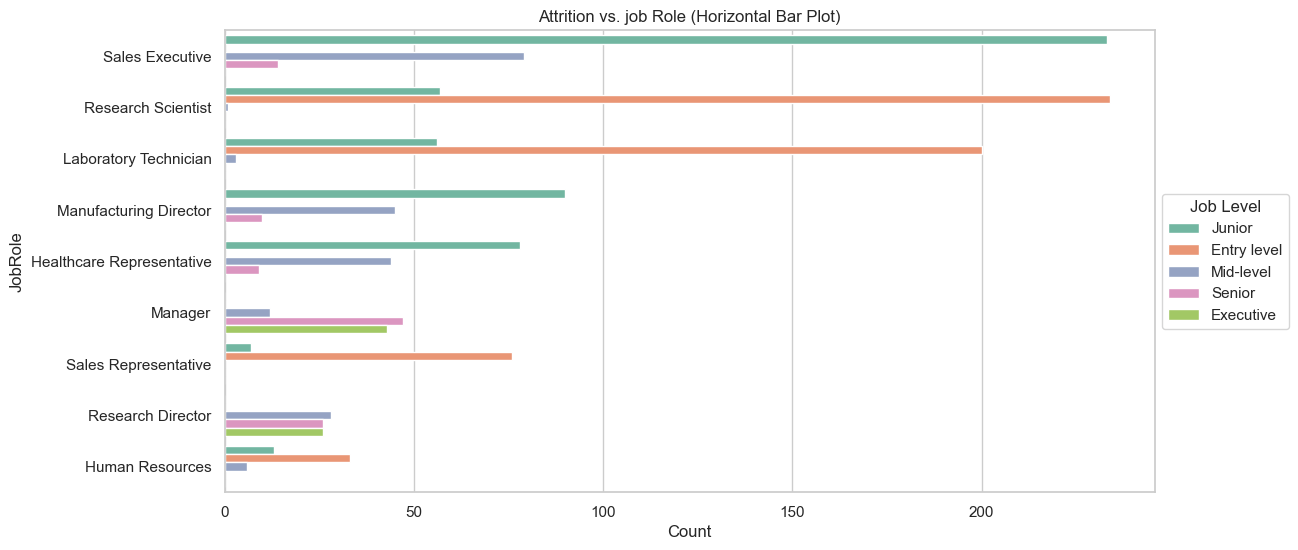

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(y='JobRole', hue='jobLevel', data=df, palette='Set2')
plt.title('Attrition vs. job Role (Horizontal Bar Plot)')
plt.xlabel('Count')
plt.ylabel('JobRole')
plt.legend(title='Job Level', loc='center left', bbox_to_anchor=(1, 0.5))  # Add legend outside the plot
plt.show()


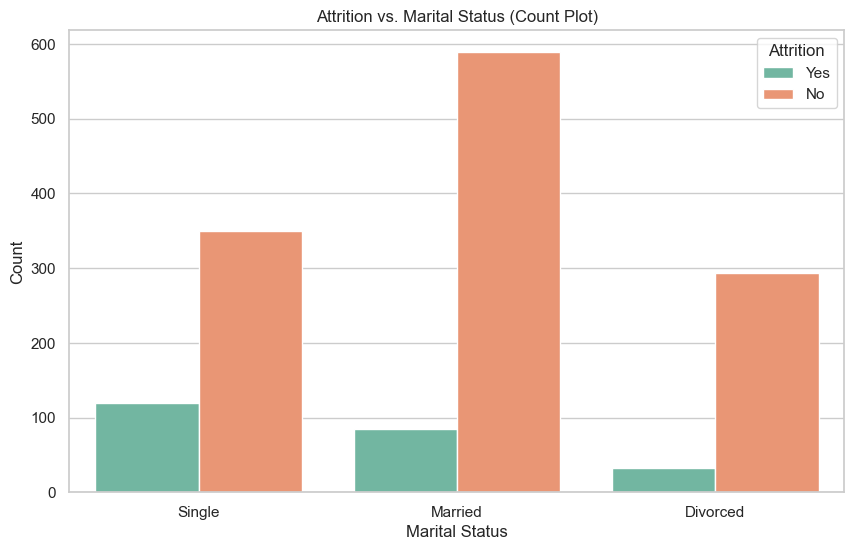

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition vs. Marital Status (Count Plot)')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

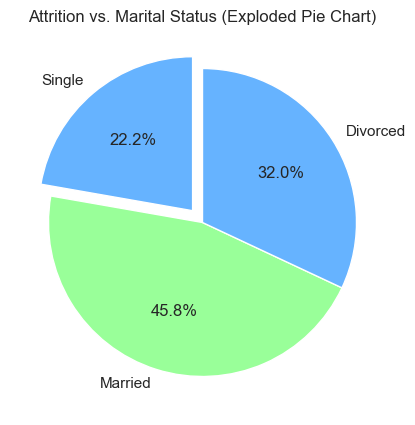

In [26]:
plt.figure(figsize=(8, 5))
explode = (0.1, 0, 0)  # explode the first slice
plt.pie(df['Attrition'].groupby(df['MaritalStatus']).count(), labels=df['MaritalStatus'].unique(), autopct='%1.1f%%', startangle=90, explode=explode, colors=['#66b3ff', '#99ff99'])
plt.title('Attrition vs. Marital Status (Exploded Pie Chart)')
plt.show()


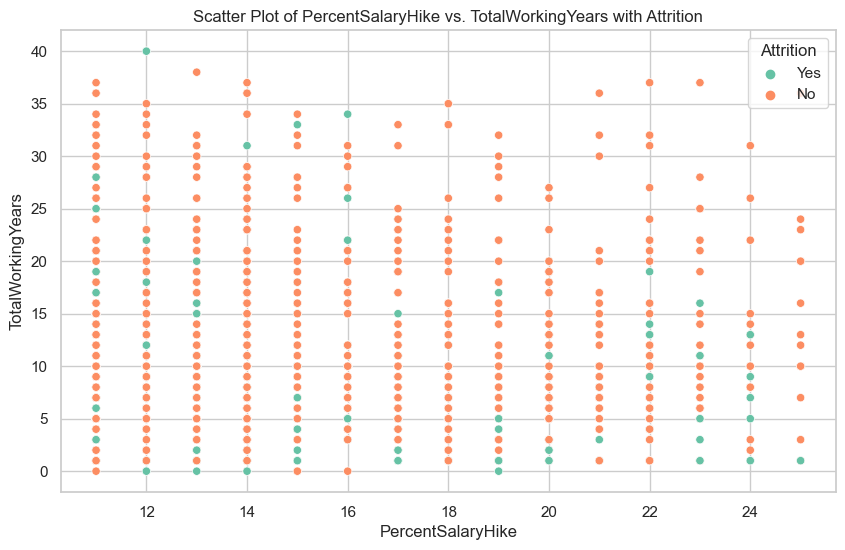

In [27]:
# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PercentSalaryHike', y='TotalWorkingYears', hue='Attrition', data=df, palette='Set2')
plt.title('Scatter Plot of PercentSalaryHike vs. TotalWorkingYears with Attrition')
plt.xlabel('PercentSalaryHike')
plt.ylabel('TotalWorkingYears')
plt.show()

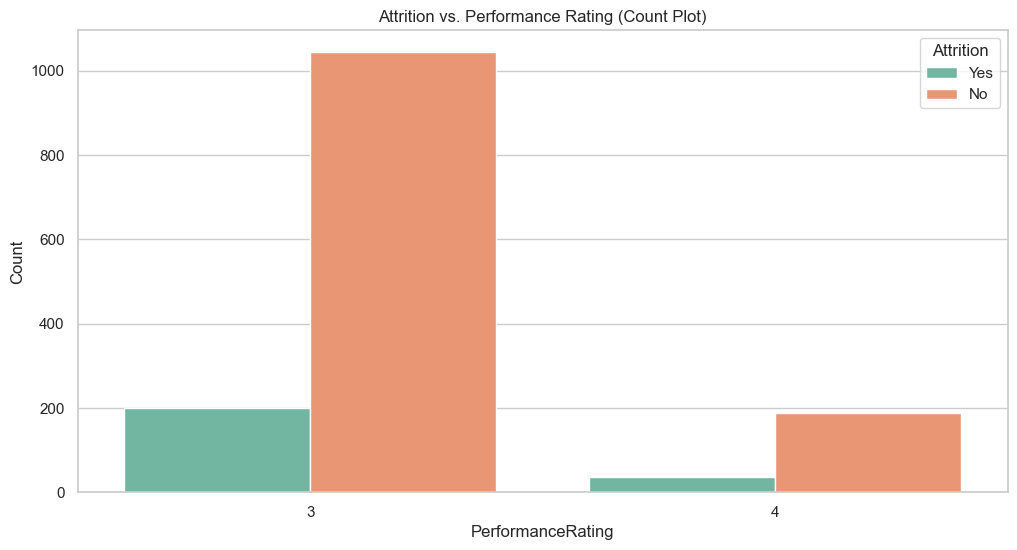

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PerformanceRating', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition vs. Performance Rating (Count Plot)')
plt.xlabel('PerformanceRating')
plt.ylabel('Count')
plt.show()

In [87]:
rate_att=df.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(rate_att,x='MonthlyIncome',y='Counts',color='Attrition',title='Monthly Income basis counts of People in an Organization')
fig.show()

In [88]:
# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [89]:
num_cols = df.select_dtypes(np.number).columns

In [90]:
new_df = df.copy()
new_df["Attrition"] = new_df["Attrition"].replace({"No":0,"Yes":1})

In [91]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_df[column],new_df["Attrition"])
    
    f_scores[column] = f_score
    p_values[column] = p_value

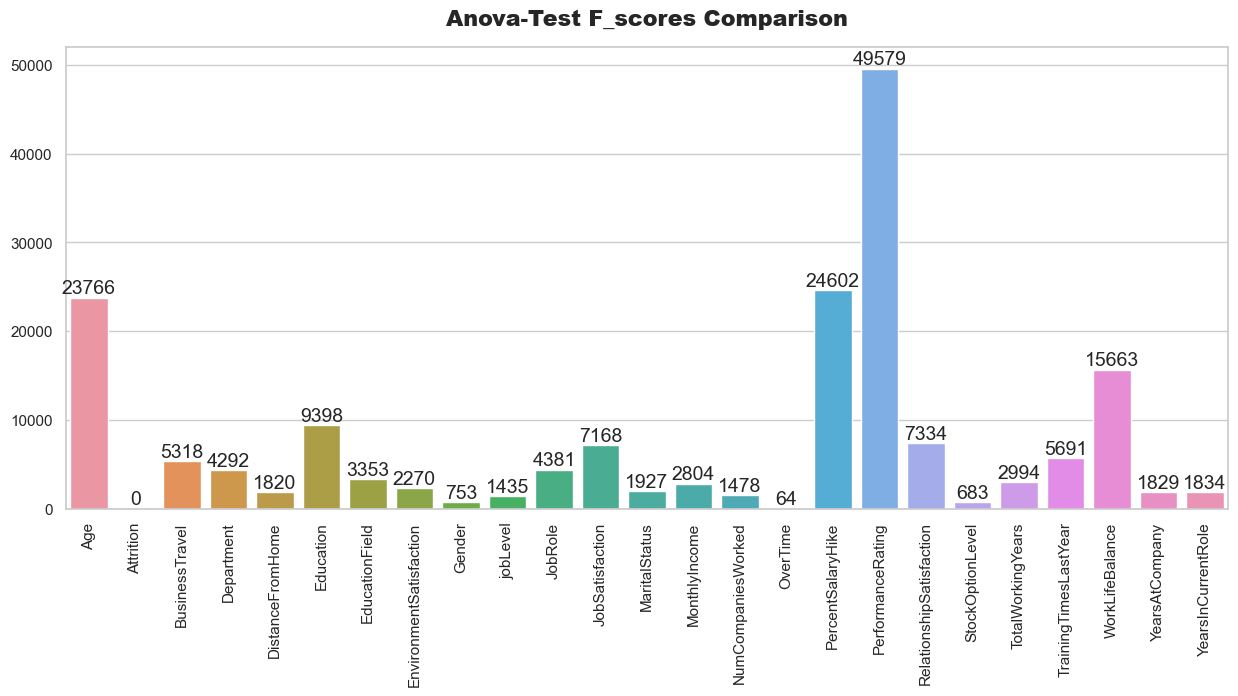

In [92]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison", fontweight="black", size=16, pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom", size=14)
plt.show()

In [93]:
annova_df = pd.DataFrame({"Features":keys,"F_Score":values})
annova_df["P_value"] = [format(p, '.20f') for p in list(p_values.values())]
annova_df

,Features,F_Score,P_value
0,Age,2.376693e+04,0.00000000000000000000
1,Attrition,-1.469261e-30,nan
2,BusinessTravel,5.318217e+03,0.00000000000000000000
3,Department,4.292226e+03,0.00000000000000000000
4,DistanceFromHome,1.820615e+03,0.00000000000000000000
5,Education,9.398988e+03,0.00000000000000000000
6,EducationField,3.353993e+03,0.00000000000000000000
7,EnvironmentSatisfaction,2.270167e+03,0.00000000000000000000
8,Gender,7.537159e+02,0.00000000000000000000
9,jobLevel,1.435207e+03,0.00000000000000000000


In [99]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")

In [100]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

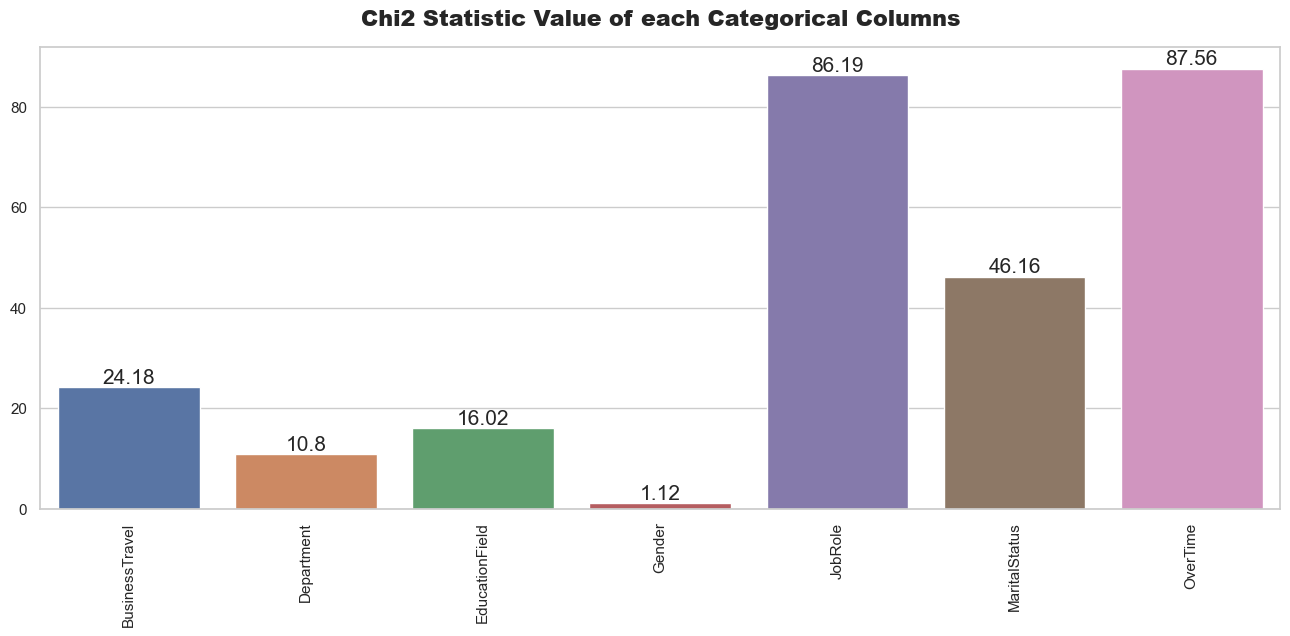

In [101]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=16,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",size=15)

plt.show()

In [102]:
chi_df = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
chi_df["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
chi_df

,Features,Chi_2 Statistic,P_value
0,BusinessTravel,24.182414,0.00000560861447644993
1,Department,10.796007,0.00452560657447963373
2,EducationField,16.024674,0.00677398013902521298
3,Gender,1.116967,0.29057244902890855265
4,JobRole,86.190254,0.00000000000000275248
5,MaritalStatus,46.163677,0.00000000009455511060
6,OverTime,87.564294,0.00000000000000000001


In [103]:
df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].replace({"Low":0 ,"Medium":1, "High":2, "Very High":3})
df["JobSatisfaction"] = df["JobSatisfaction"].replace({"Low":0,"Medium":1,"High":2,"Very High":3})
df["PerformanceRating"] = df["PerformanceRating"].replace({"Low":0,"Good":1,"Excellent":2,"Outstanding":3})
df["RelationshipSatisfaction"] = df["RelationshipSatisfaction"].replace({"Low":0,"Medium":1,"High":2,"Very High":3})
df["WorkLifeBalance"] = df["WorkLifeBalance"].replace({"Bad":0,"Good":1,"Better":2,"Best":3})
df["Education"] = df["Education"].replace({"Below College":0,"College":1,"Bachelor":2,"Master":3,"Doctor":4})
df["jobLevel"] = df["jobLevel"].replace({"Entry Level":0,"Junior Level":1,"Mid Level":2,
                                           "Senior Level":3,"Executive Level":4})
df["Gender"] = df["Gender"].replace({"Female":0 ,"Male":1})
df["Attrition"] = df["Attrition"].replace({"No":0 ,"Yes":1})

In [104]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['OverTime'] = le.fit_transform(df['OverTime'])
df['EnvironmentSatisfaction'] = le.fit_transform(df['EnvironmentSatisfaction'])
df['jobLevel'] = le.fit_transform(df['jobLevel'])

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int32
 3   Department                1470 non-null   int32
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int32
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int64
 9   jobLevel                  1470 non-null   int64
 10  JobRole                   1470 non-null   int32
 11  JobSatisfaction           1470 non-null   int64
 12  MaritalStatus             1470 non-null   int32
 13  MonthlyIncome             1470 non-null   int64
 14  NumCompaniesWorked        1470 non-null 

<Axes: title={'center': 'Correlation Plot'}>

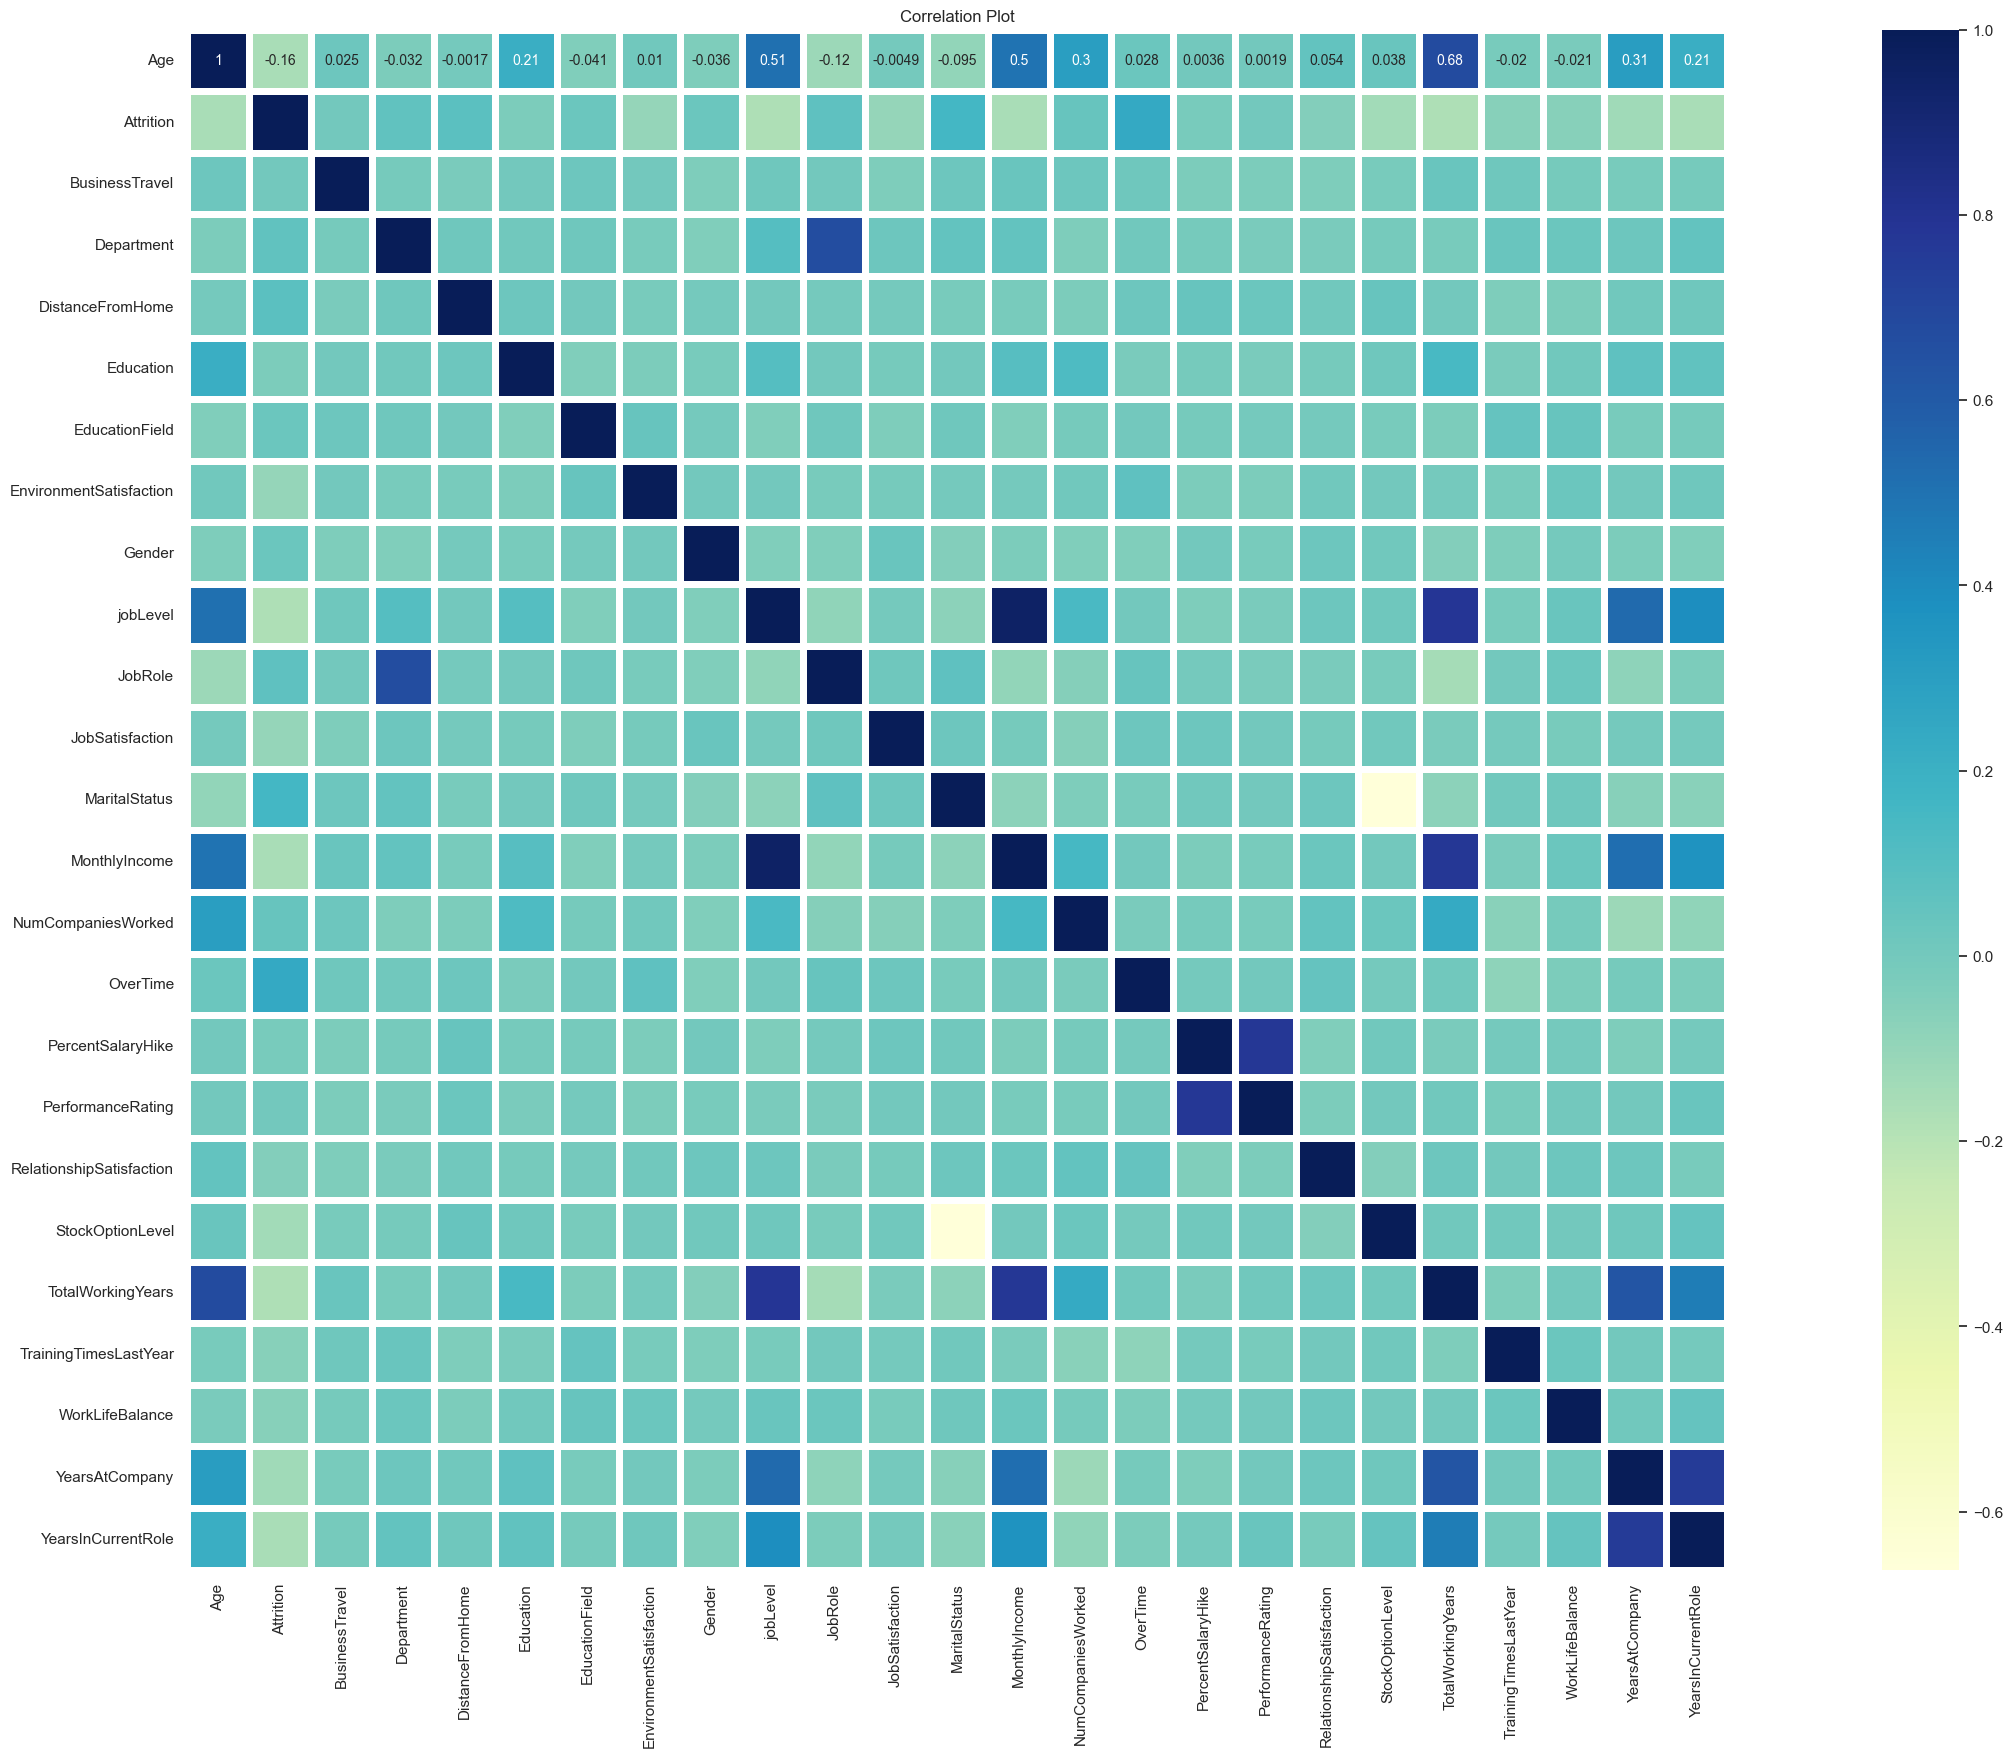

In [107]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(df.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

In [108]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

# Optionally, you can filter the correlation matrix to display only the highly correlated values
correlation_matrix.where(high_correlation_mask, inplace=True)

Highly correlated features:
jobLevel and MonthlyIncome
jobLevel and TotalWorkingYears
MonthlyIncome and TotalWorkingYears
PercentSalaryHike and PerformanceRating
YearsAtCompany and YearsInCurrentRole


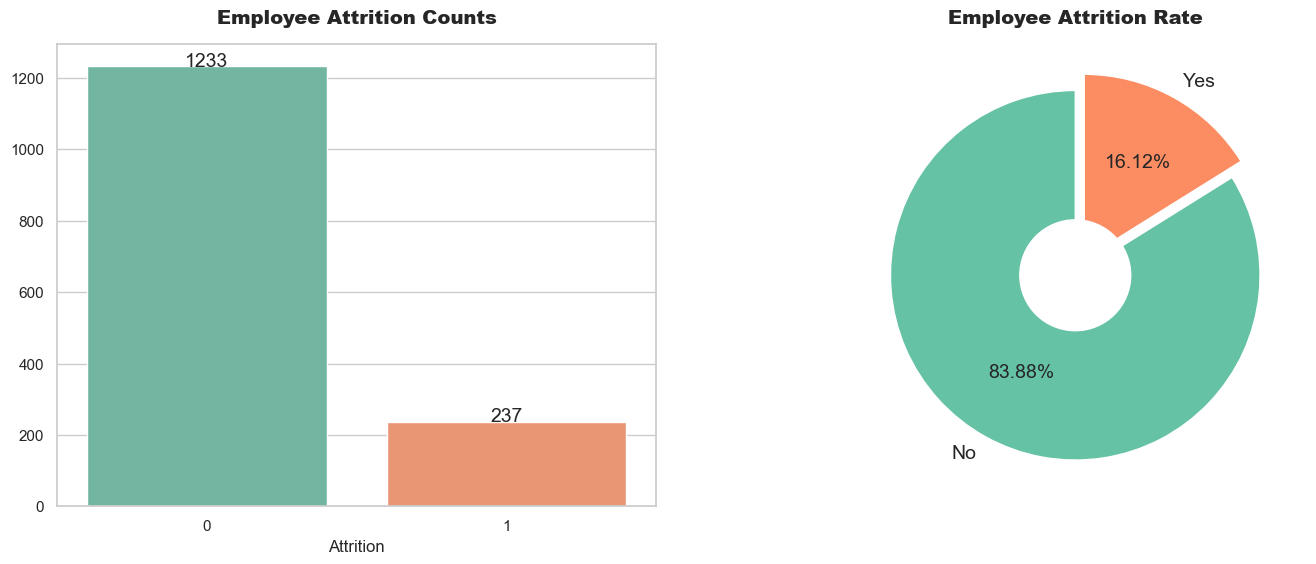

In [109]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

In [110]:
x = df.drop(['Attrition'], axis=1)
y = df[['Attrition']]

In [111]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int32
 2   Department                1470 non-null   int32
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EducationField            1470 non-null   int32
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   Gender                    1470 non-null   int64
 8   jobLevel                  1470 non-null   int64
 9   JobRole                   1470 non-null   int32
 10  JobSatisfaction           1470 non-null   int64
 11  MaritalStatus             1470 non-null   int32
 12  MonthlyIncome             1470 non-null   int64
 13  NumCompaniesWorked        1470 non-null   int64
 14  OverTime                  1470 non-null 

In [112]:
x.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,jobLevel,JobRole,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,41,2,2,1,2,1,1,0,1,7,...,1,11,3,1,0,8,0,1,6,4
1,49,1,1,8,1,1,2,1,1,6,...,0,23,4,4,1,10,3,3,10,7
2,37,2,1,2,2,4,3,1,0,2,...,1,15,3,2,0,7,3,3,0,0
3,33,1,1,3,4,1,3,0,0,6,...,1,11,3,3,0,8,3,3,8,7
4,27,2,1,2,1,3,0,1,0,2,...,0,12,3,4,1,6,3,3,2,2


In [113]:
y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [114]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print(y.value_counts())
print()
print(y_smote.value_counts())

Attrition
0            1233
1             237
Name: count, dtype: int64

Attrition
0            1233
1            1233
Name: count, dtype: int64


In [115]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [116]:
x_scaled = scaler.fit_transform(x_smote)
data_scaled = scaler.fit_transform(df)

In [117]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20)

In [118]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(1176, 24) (1176, 1) (294, 24) (294, 1)


In [119]:
#Split the Data into Training and Test (Scaled)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y_smote, test_size=0.2, random_state=42)

In [120]:
print(x_train1.shape, y_train1.shape, x_test1.shape, y_test1.shape)

(1972, 24) (1972, 1) (494, 24) (494, 1)


In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from sklearn import metrics
from sklearn.metrics import *

In [122]:
training_score = []
testing_score = []
precission = []
recall = []
auc_score = []

In [123]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    y_test_prob1 = model.predict_proba(x_test1)[:, 1]
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    c = precision_score(y_test1,x_test_pred1)
    d = recall_score(y_test1,x_test_pred1)
    e = roc_auc_score(y_test1, y_test_prob1)
    training_score.append(a)
    testing_score.append(b)
    precission.append(c)
    recall.append(d)
    auc_score.append(e)
    
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    
    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba1 = model.predict_proba(x_test1)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test1, y_pred_proba1)
    auc = roc_auc_score(y_test1, y_pred_proba1)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()


Accuracy_Score of LogisticRegression() model on Training Data is: 81.89655172413794
Accuracy_Score of LogisticRegression() model on Testing Data is: 78.74493927125506

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.7813765182186235
Recall Score of LogisticRegression() model is: 0.7909836065573771
AUC Score of LogisticRegression() model is: 0.8757213114754098

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


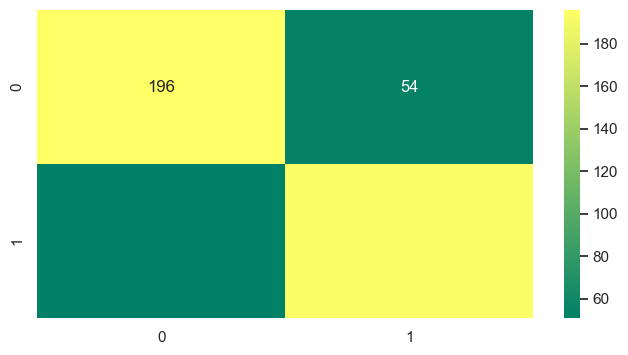


------------------------------------------------------------------------
ROC - AUC Curve of LogisticRegression() model is:


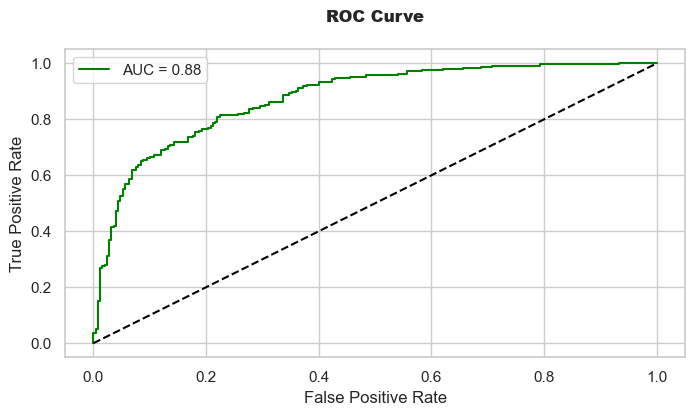

In [124]:
model_prediction(LogisticRegression())

Accuracy_Score of KNeighborsClassifier() model on Training Data is: 90.26369168356997
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 83.19838056680162

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.7766323024054983
Recall Score of KNeighborsClassifier() model is: 0.9262295081967213
AUC Score of KNeighborsClassifier() model is: 0.9369426229508198

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


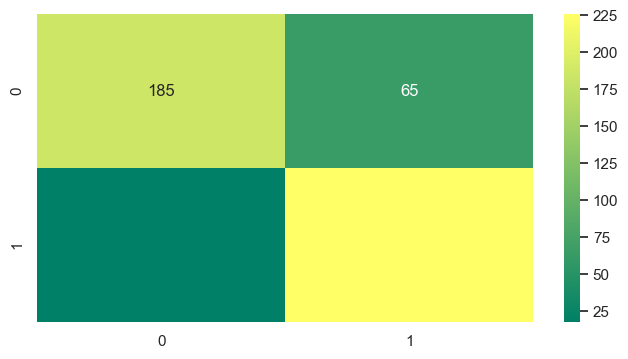


------------------------------------------------------------------------
ROC - AUC Curve of KNeighborsClassifier() model is:


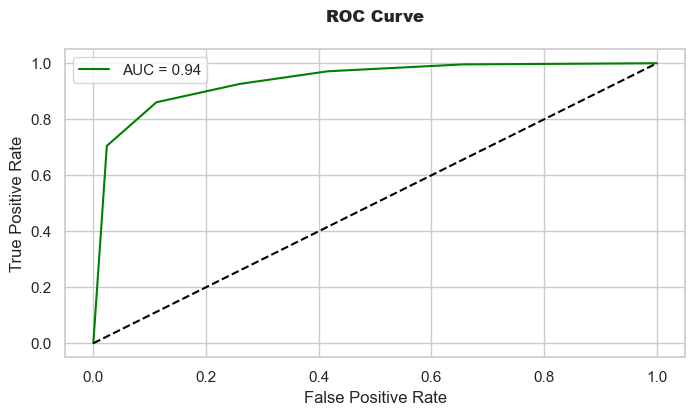

In [125]:
model_prediction(KNeighborsClassifier())

Accuracy_Score of GaussianNB() model on Training Data is: 73.07302231237323
Accuracy_Score of GaussianNB() model on Testing Data is: 71.86234817813765

------------------------------------------------------------------------
Precision Score of GaussianNB() model is: 0.6855123674911661
Recall Score of GaussianNB() model is: 0.7950819672131147
AUC Score of GaussianNB() model is: 0.8214426229508196

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


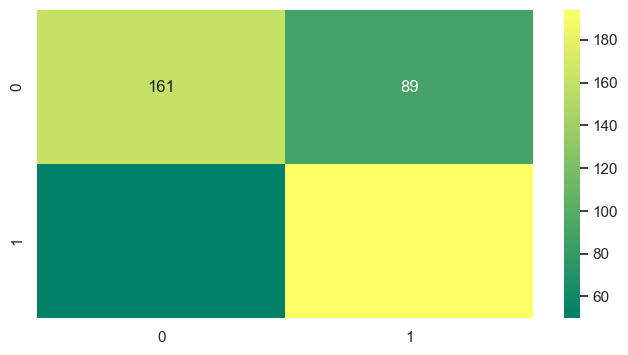


------------------------------------------------------------------------
ROC - AUC Curve of GaussianNB() model is:


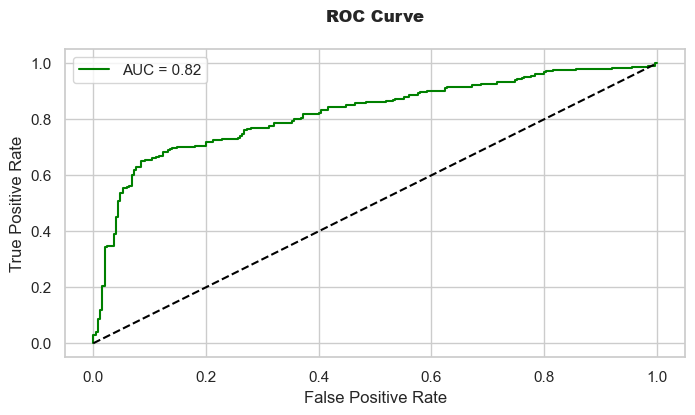

In [126]:
model_prediction(GaussianNB())

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 80.97165991902834

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.8151260504201681
Recall Score of DecisionTreeClassifier() model is: 0.7950819672131147
AUC Score of DecisionTreeClassifier() model is: 0.8095409836065574

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


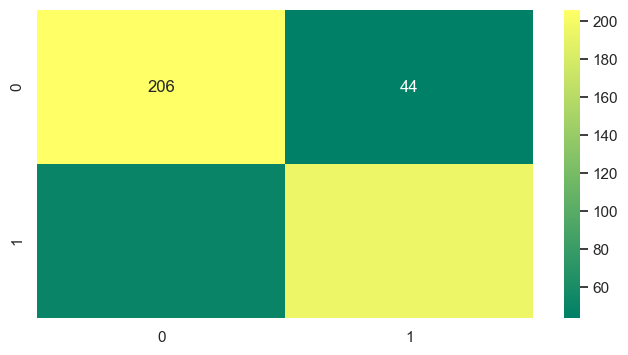


------------------------------------------------------------------------
ROC - AUC Curve of DecisionTreeClassifier() model is:


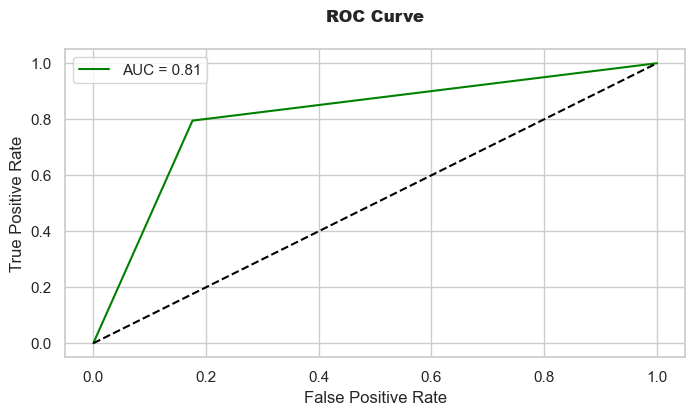

In [127]:
model_prediction(DecisionTreeClassifier())

Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 88.05668016194332

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.9111111111111111
Recall Score of RandomForestClassifier() model is: 0.8401639344262295
AUC Score of RandomForestClassifier() model is: 0.9553606557377049

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


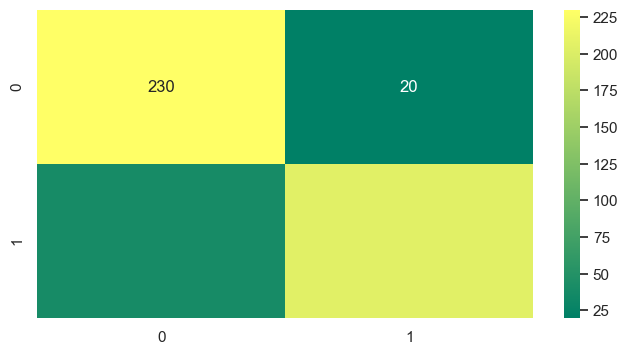


------------------------------------------------------------------------
ROC - AUC Curve of RandomForestClassifier() model is:


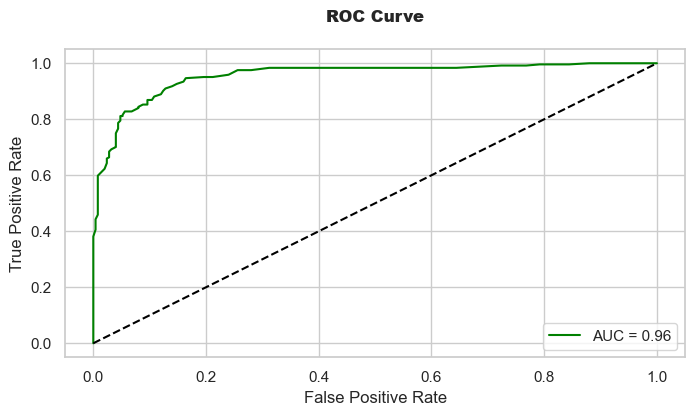

In [128]:
#Random Forest
model_prediction(RandomForestClassifier())

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 94.1683569979716
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 89.06882591093117

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.9130434782608695
Recall Score of GradientBoostingClassifier() model is: 0.860655737704918
AUC Score of GradientBoostingClassifier() model is: 0.9411475409836065

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


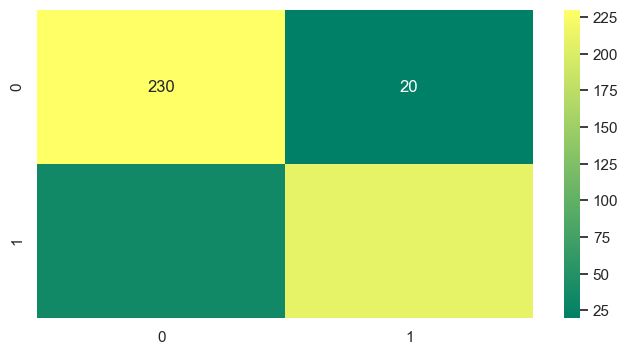


------------------------------------------------------------------------
ROC - AUC Curve of GradientBoostingClassifier() model is:


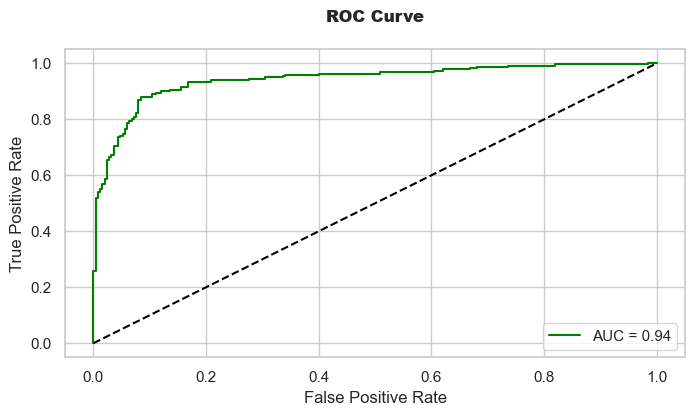

In [129]:
model_prediction(GradientBoostingClassifier())

Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model on Training Data is: 100.0
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, e

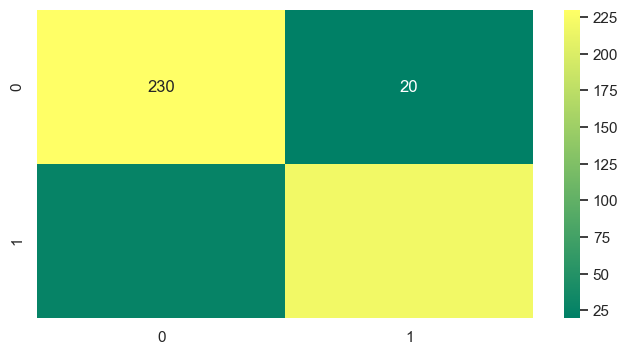


------------------------------------------------------------------------
ROC - AUC Curve of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model is:


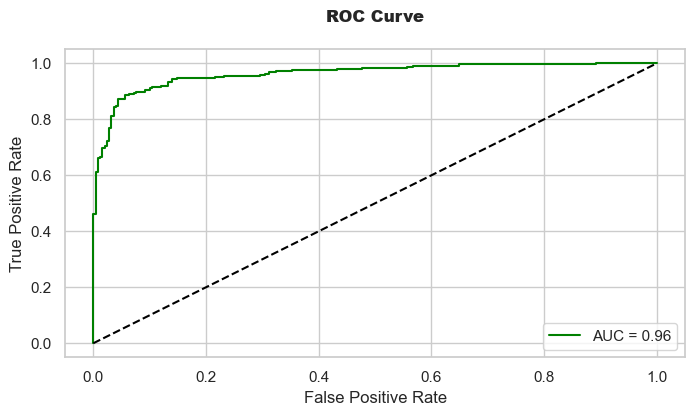

In [130]:
model_prediction(XGBClassifier())

In [131]:
models = ["Logistic Regression","KNN","Naive Bayes","Decision Tree","Random Forest",
          "Gradient Boost","XGBoost"]

In [132]:
df1 = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score,
                  "Precision": precission,
                  "Recall": recall,
                  "AUC Score": auc_score})
df1


,Algorithms,Training Score,Testing Score,Precision,Recall,AUC Score
0,Logistic Regression,81.896552,78.744939,0.781377,0.790984,0.875721
1,KNN,90.263692,83.198381,0.776632,0.926230,0.936943
2,Naive Bayes,73.073022,71.862348,0.685512,0.795082,0.821443
3,Decision Tree,100.000000,80.971660,0.815126,0.795082,0.809541
4,Random Forest,100.000000,88.056680,0.911111,0.840164,0.955361
5,Gradient Boost,94.168357,89.068826,0.913043,0.860656,0.941148
6,XGBoost,100.000000,90.890688,0.916318,0.897541,0.962230


In [133]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int32
 2   Department                1470 non-null   int32
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EducationField            1470 non-null   int32
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   Gender                    1470 non-null   int64
 8   jobLevel                  1470 non-null   int64
 9   JobRole                   1470 non-null   int32
 10  JobSatisfaction           1470 non-null   int64
 11  MaritalStatus             1470 non-null   int32
 12  MonthlyIncome             1470 non-null   int64
 13  NumCompaniesWorked        1470 non-null   int64
 14  OverTime                  1470 non-null 

In [134]:
dt=DecisionTreeClassifier()
dt.fit(train_x,train_y)
dt_pred=dt.predict(test_x)

In [135]:
dt.score(test_x,test_y)

0.8027210884353742

In [136]:
XGB=XGBClassifier()

In [137]:
XGB.fit(train_x,train_y)
y_pred=XGB.predict(test_x)

In [138]:
XGB.score(test_x,test_y)

0.8605442176870748

In [139]:
rfc=RandomForestClassifier()
rfc.fit(train_x,train_y)
rfc_pred=rfc.predict(test_x)

In [140]:
rfc.score(test_x,test_y)

0.8401360544217688

In [141]:
x.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,jobLevel,JobRole,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,41,2,2,1,2,1,1,0,1,7,...,1,11,3,1,0,8,0,1,6,4
1,49,1,1,8,1,1,2,1,1,6,...,0,23,4,4,1,10,3,3,10,7
2,37,2,1,2,2,4,3,1,0,2,...,1,15,3,2,0,7,3,3,0,0
3,33,1,1,3,4,1,3,0,0,6,...,1,11,3,3,0,8,3,3,8,7
4,27,2,1,2,1,3,0,1,0,2,...,0,12,3,4,1,6,3,3,2,2


In [142]:
y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [143]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int32
 2   Department                1470 non-null   int32
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EducationField            1470 non-null   int32
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   Gender                    1470 non-null   int64
 8   jobLevel                  1470 non-null   int64
 9   JobRole                   1470 non-null   int32
 10  JobSatisfaction           1470 non-null   int64
 11  MaritalStatus             1470 non-null   int32
 12  MonthlyIncome             1470 non-null   int64
 13  NumCompaniesWorked        1470 non-null   int64
 14  OverTime                  1470 non-null 

In [144]:
x.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,jobLevel,JobRole,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,41,2,2,1,2,1,1,0,1,7,...,1,11,3,1,0,8,0,1,6,4
1,49,1,1,8,1,1,2,1,1,6,...,0,23,4,4,1,10,3,3,10,7
2,37,2,1,2,2,4,3,1,0,2,...,1,15,3,2,0,7,3,3,0,0
3,33,1,1,3,4,1,3,0,0,6,...,1,11,3,3,0,8,3,3,8,7
4,27,2,1,2,1,3,0,1,0,2,...,0,12,3,4,1,6,3,3,2,2


In [171]:
x.head(106)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,jobLevel,JobRole,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,41,2,2,1,2,1,1,0,1,7,...,1,11,3,1,0,8,0,1,6,4
1,49,1,1,8,1,1,2,1,1,6,...,0,23,4,4,1,10,3,3,10,7
2,37,2,1,2,2,4,3,1,0,2,...,1,15,3,2,0,7,3,3,0,0
3,33,1,1,3,4,1,3,0,0,6,...,1,11,3,3,0,8,3,3,8,7
4,27,2,1,2,1,3,0,1,0,2,...,0,12,3,4,1,6,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,32,2,1,1,1,1,3,1,0,6,...,0,13,3,4,0,1,2,3,1,0
102,20,1,1,6,3,1,3,0,0,2,...,1,18,3,2,0,1,5,3,1,0
103,34,2,1,6,4,4,0,0,1,6,...,0,14,3,3,0,16,3,3,16,13
104,37,0,1,2,2,1,2,1,1,0,...,0,14,3,4,1,17,2,4,1,0


In [155]:
column_names = df.columns.tolist()
print(column_names)

['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'jobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole']


In [156]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# rfc = RandomForestClassifier(...)  # Include your model parameters here

def recommendation(Age ,BusinessTravel ,Department ,DistanceFromHome ,Education ,EducationField,EnvironmentSatisfaction ,Gender ,jobLevel ,JobRole ,JobSatisfaction,MaritalStatus ,MonthlyIncome ,NumCompaniesWorked ,OverTime ,PercentSalaryHike ,PerformanceRating ,RelationshipSatisfaction ,StockOptionLevel ,TotalWorkingYears ,TrainingTimesLastYear ,WorkLifeBalance ,YearsAtCompany ,YearsInCurrentRole):
    features = pd.DataFrame([[Age, BusinessTravel, Department,DistanceFromHome, Education, EducationField,EnvironmentSatisfaction, Gender ,jobLevel ,JobRole ,JobSatisfaction, MaritalStatus, MonthlyIncome,NumCompaniesWorked ,OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel,TotalWorkingYears ,TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole]],
                            columns=['Age', 'BusinessTravel', 'Department','DistanceFromHome', 'Education', 'EducationField','EnvironmentSatisfaction', 'Gender', 'jobLevel', 'JobRole','JobSatisfaction', 'MaritalStatus', 'MonthlyIncome','NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole'])

    prediction = XGB.predict(features)

    attrition_mapping = {0: 'No', 1: 'Yes'}
    predicted_label = attrition_mapping.get(prediction[0], 'Unknown')

    return prediction[0], predicted_label

Age = 41                  
BusinessTravel = 2          
Department = 2         
DistanceFromHome =  1        
Education = 2                
EducationField = 1          
EnvironmentSatisfaction = 1  
Gender = 0                 
jobLevel = 1                
JobRole = 7
JobSatisfaction = 4
MaritalStatus = 1          
MonthlyIncome = 5993           
NumCompaniesWorked = 8  
OverTime = 1                 
PercentSalaryHike = 11       
PerformanceRating = 3      
RelationshipSatisfaction = 1
StockOptionLevel = 0        
TotalWorkingYears = 8       
TrainingTimesLastYear = 0
WorkLifeBalance = 1          
YearsAtCompany = 6           
YearsInCurrentRole = 4



prediction_numeric, prediction_label = recommendation(Age, BusinessTravel, Department, DistanceFromHome, Education, EducationField,EnvironmentSatisfaction ,Gender,jobLevel ,JobRole ,JobSatisfaction  ,MaritalStatus, MonthlyIncome,NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel,TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole)

print(f"Predicted Attrition (Numeric): {prediction_numeric}")
print(f"Predicted Attrition (Label): {prediction_label}")

Predicted Attrition (Numeric): 1
Predicted Attrition (Label): Yes


In [157]:
Age ,BusinessTravel ,Department ,DistanceFromHome ,Education ,EducationField ,Gender ,JobRole ,jobLevel ,MaritalStatus ,MonthlyIncome ,NumCompaniesWorked ,OverTime ,PercentSalaryHike ,PerformanceRating ,RelationshipSatisfaction ,StockOptionLevel ,TotalWorkingYears ,TrainingTimesLastYear ,WorkLifeBalance ,YearsAtCompany ,YearsInCurrentRole

(41, 2, 2, 1, 2, 1, 0, 7, 1, 1, 5993, 8, 1, 11, 3, 1, 0, 8, 0, 1, 6, 4)

In [158]:
import pickle

In [159]:
pickle.dump(XGB,open('XGB.pkl','wb'))

In [160]:
pickle.dump(rfc,open('model2.pkl','wb'))